Lets LOOK into vision.

Some of the examples are from [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). 

## Introduction to convnets

**Instantiating a small convnet**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

See that the output of every Conv2D and MaxPooling2D layer is a rank-3 tensor of shape (28,28,1) - this is our weight, height and channels.

**Training the convnet on MNIST images**

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 34s 35ms/step - loss: 0.1561 - accuracy: 0.9510
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0440 - accuracy: 0.9861
Epoch 3/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0302 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0226 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0176 - accuracy: 0.9946


**Evaluating the convnet**

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 3s 7ms/step - loss: 0.0264 - accuracy: 0.9910
Test accuracy: 0.991


## Training a convnet from scratch on a small dataset

### Downloading the data

Here it is: https://www.kaggle.com/datasets/a9be70d5dadd7f7e222819b0b0b0765048ca2b88465fef1d749f71a89c2915f5  

**Copying images to training, validation, and test directories**

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("dogs_vs_cats_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

Important: The depth of the feature maps progressively increases (from 32 to 256) and the size of the feature maps decreases (from 180 × 180 to 7 × 7). This is common pattern with covnets.

**Configuring the model for training**

In [12]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

What we need to do:
1. Open the pictures
2. Decode the JPEG content to RGB channels with pixels (3 channels with given color pixel intensity)
3. Convert the decoded information into floating-point tensors.
4. Resize all pictures to a shared size (we’ll use 180 × 180).
5. Create batches (here of 32 examples)

**Using `image_dataset_from_directory` to read images**

If the outlined tasks seem daunting - the image_dataset_from_directory does the most of the job for us.

In [15]:
from tensorflow.keras.utils import image_dataset_from_directory

new_base_dir = pathlib.Path("cats_vs_dogs_small")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1962 files belonging to 2 classes.
Found 999 files belonging to 2 classes.
Found 983 files belonging to 2 classes.


Dataset API:

In [16]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [17]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break
dataset.shape

(16,)
(16,)
(16,)


In [18]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [19]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [20]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

ModelCheckpoint callback: we are saving our model after each epoch

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
62/62 [==============================] - 96s 2s/step - loss: 0.7792 - accuracy: 0.5168 - val_loss: 0.6918 - val_accuracy: 0.5435
Epoch 2/30
62/62 [==============================] - 82s 1s/step - loss: 0.7088 - accuracy: 0.5515 - val_loss: 0.6808 - val_accuracy: 0.5385
Epoch 3/30
62/62 [==============================] - 79s 1s/step - loss: 0.6844 - accuracy: 0.5856 - val_loss: 0.5985 - val_accuracy: 0.6737
Epoch 4/30
62/62 [==============================] - 80s 1s/step - loss: 0.6390 - accuracy: 0.6427 - val_loss: 0.6011 - val_accuracy: 0.6637
Epoch 5/30
62/62 [==============================] - 78s 1s/step - loss: 0.5852 - accuracy: 0.6779 - val_loss: 0.6121 - val_accuracy: 0.6527
Epoch 6/30
62/62 [==============================] - 76s 1s/step - loss: 0.5436 - accuracy: 0.7212 - val_loss: 1.1620 - val_accuracy: 0.5586
Epoch 7/30
62/62 [==============================] - 75s 1s/step - loss: 0.5146 - accuracy: 0.7497 - val_loss: 0.5431 - val_accuracy: 0.7127
Epoch 8/30
62/62 [==

**Displaying curves of loss and accuracy during training**

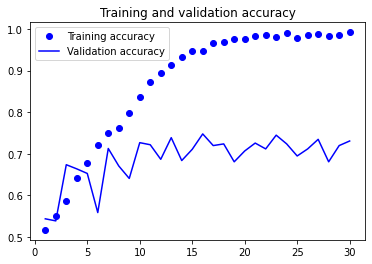

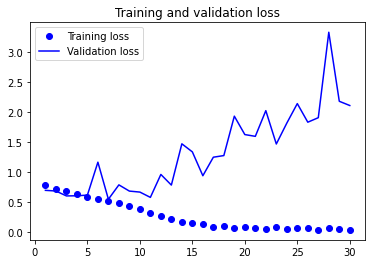

In [22]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

What does it look like? What happened to our model? Why?

**Evaluating the model on the test set**

In [23]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

31/31 [==============================] - 14s 398ms/step - loss: 0.6124 - accuracy: 0.6806
Test accuracy: 0.681


### Using data augmentation

Too few datapoints! What we will do? Augment our dataset.

**Define a data augmentation stage to add to an image model**

In [24]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

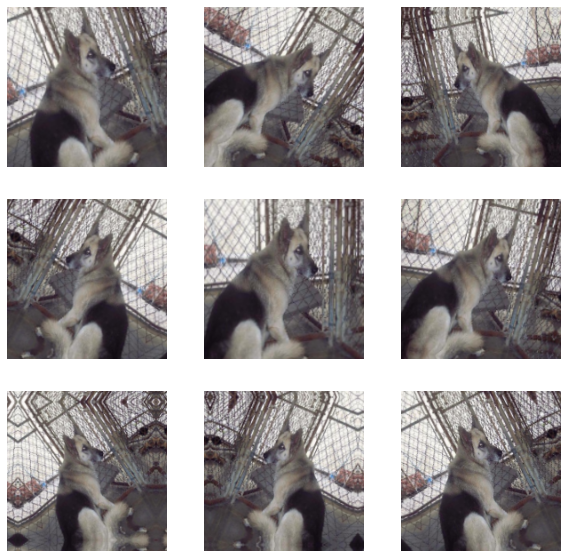

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [26]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
62/62 [==============================] - 122s 2s/step - loss: 0.6950 - accuracy: 0.5224 - val_loss: 0.8680 - val_accuracy: 0.4995
Epoch 2/30
62/62 [==============================] - 119s 2s/step - loss: 0.6963 - accuracy: 0.5377 - val_loss: 0.6932 - val_accuracy: 0.5245
Epoch 3/30
62/62 [==============================] - 117s 2s/step - loss: 0.6945 - accuracy: 0.5989 - val_loss: 0.6529 - val_accuracy: 0.6026
Epoch 4/30
62/62 [==============================] - 118s 2s/step - loss: 0.6601 - accuracy: 0.6310 - val_loss: 0.5962 - val_accuracy: 0.6777
Epoch 5/30
62/62 [==============================] - 117s 2s/step - loss: 0.6432 - accuracy: 0.6381 - val_loss: 0.6135 - val_accuracy: 0.6446
Epoch 6/30
62/62 [==============================] - 119s 2s/step - loss: 0.6160 - accuracy: 0.6713 - val_loss: 0.6885 - val_accuracy: 0.5776
Epoch 7/30
62/62 [==============================] - 105s 2s/step - loss: 0.6005 - accuracy: 0.6820 - val_loss: 0.5994 - val_accuracy: 0.6637
Epoch 8/30
62

**Evaluating the model on the test set**

In [29]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

31/31 [==============================] - 19s 575ms/step - loss: 0.5331 - accuracy: 0.7528
Test accuracy: 0.753


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [30]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 84s 1us/step


In [31]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Article on the VGG16 from 2014: https://arxiv.org/abs/1409.1556.  
As you see it is from far back, but has a simmilar architecture to what we used before.  
Where we find all the models: https://keras.io/api/applications/

![VGG16](../img/vgg16.png)

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [32]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [33]:
train_features.shape

(1962, 5, 5, 512)

**Defining and training the densely connected classifier**

In [34]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
62/62 [==============================] - 8s 87ms/step - loss: 17.6162 - accuracy: 0.9251 - val_loss: 4.9358 - val_accuracy: 0.9660
Epoch 2/20
62/62 [==============================] - 5s 78ms/step - loss: 3.7308 - accuracy: 0.9766 - val_loss: 6.4423 - val_accuracy: 0.9670
Epoch 3/20
62/62 [==============================] - 4s 68ms/step - loss: 2.7266 - accuracy: 0.9806 - val_loss: 7.0426 - val_accuracy: 0.9720
Epoch 4/20
62/62 [==============================] - 4s 71ms/step - loss: 0.7323 - accuracy: 0.9934 - val_loss: 6.2092 - val_accuracy: 0.9750
Epoch 5/20
62/62 [==============================] - 5s 88ms/step - loss: 0.7926 - accuracy: 0.9924 - val_loss: 8.5435 - val_accuracy: 0.9720
Epoch 6/20
62/62 [==============================] - 7s 107ms/step - loss: 0.8128 - accuracy: 0.9929 - val_loss: 11.3303 - val_accuracy: 0.9590
Epoch 7/20
62/62 [==============================] - 4s 64ms/step - loss: 0.5621 - accuracy: 0.9944 - val_loss: 6.5153 - val_accuracy: 0.9720
Epoch 8/20

**Plotting the results**

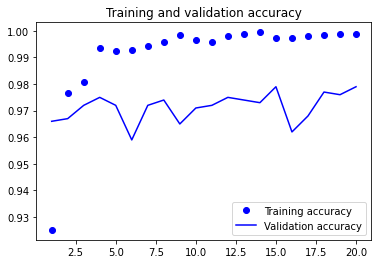

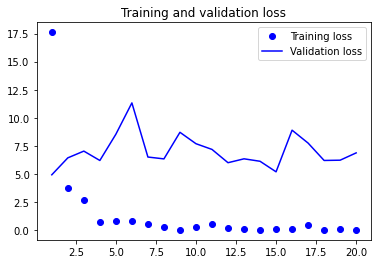

In [35]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [36]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [37]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [38]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [39]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [41]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
62/62 [==============================] - 1295s 21s/step - loss: 8.3055 - accuracy: 0.9419 - val_loss: 3.8392 - val_accuracy: 0.9690
Epoch 2/10
62/62 [==============================] - 743s 12s/step - loss: 6.0368 - accuracy: 0.9526 - val_loss: 3.6727 - val_accuracy: 0.9760
Epoch 3/10
62/62 [==============================] - 625s 10s/step - loss: 4.3455 - accuracy: 0.9643 - val_loss: 7.1156 - val_accuracy: 0.9630
Epoch 4/10
62/62 [==============================] - 699s 11s/step - loss: 3.7178 - accuracy: 0.9684 - val_loss: 6.0244 - val_accuracy: 0.9700
Epoch 5/10
62/62 [==============================] - 494s 8s/step - loss: 4.3820 - accuracy: 0.9674 - val_loss: 5.1210 - val_accuracy: 0.9730
Epoch 6/10
62/62 [==============================] - 474s 8s/step - loss: 3.5249 - accuracy: 0.9684 - val_loss: 4.6848 - val_accuracy: 0.9760
Epoch 7/10
62/62 [==============================] - 425s 7s/step - loss: 2.3560 - accuracy: 0.9720 - val_loss: 4.9942 - val_accuracy: 0.9710
Epoch 8/

**Evaluating the model on the test set**

In [42]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

31/31 [==============================] - 140s 4s/step - loss: 5.3380 - accuracy: 0.9664
Test accuracy: 0.966


### Fine-tuning a pretrained model

In [43]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [44]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")